<a href="https://colab.research.google.com/github/victordeman/projects/blob/master/Brest%20Cancer%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Description: This program detects(classifies ...) brest cancer, based off of data.

Image classification:Brest cancer
past and current projects Cancer starts when cells begin to grow out of control. Breast cancer cells usually form a tumor that can often be seen on an x-ray or felt as a lump. Breast cancer occurs almost entirely in women.Most breast cancers begin in the ducts that carry milk to the nipple (ductal cancers).Some start in the glands that make breast milk (lobular cancers).There are also other types of breast cancer that are less common like phyllodes tumor and angiosarcoma. A small number of cancers start in other tissues in the breast. These cancers are called sarcomas and lymphomas and are not really thought of as breast cancers.

Once a biopsy is done, breast cancer cells are tested for proteins called estrogen receptors, progesterone receptors and HER2. The tumor cells are also closely looked at in the lab to find out what grade it is. The specific proteins found and the tumor grade can help decide treatment options.


In [0]:
# import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# load the data
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('data.csv')


Saving data.csv to data.csv


In [4]:
df.head(7)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN


In [5]:
# count the number of rows and columns in the data set
# we can see that there are 33 features or different data points from this dataset
df.shape

(569, 33)

In [6]:
# here we want to get a count of the number of empty(NaN, NAN, na) values in each column
# the numbers with 0 have no empty values
# we can get rid of the column with many empty values

df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [0]:
# Drop the column with all empty values
df = df.dropna(axis=1)

In [8]:
# get the new count of the number of rows and columns
# so generally, the data is being cleaned before the classification starts
df.shape

(569, 32)

In [9]:
# here we get the number of cells that are either malignant (M) or Benign (B) 
# i want to show that count of the values

df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

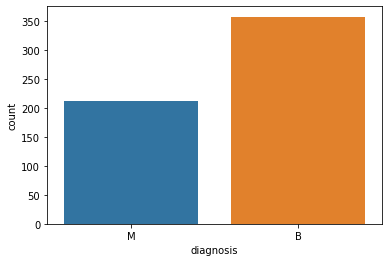

In [10]:
# visualize the count using the seaborn library
# we want to count of the diagnosis column
# i give it a label on the y axis "count"
sns.countplot(df['diagnosis'], label='count')

on the y axis, we have the count of malignant and beingn values. We can see visually that there are more patients with benign cells, is do not have cancer, than thos that do have cancer

In [11]:
# here, we want to look at the data types to see which columns need to be encoded
#ie columns that need to be transformed to a number value ie an integer or float
# we are looking for categorical data or object data trypes
# ".dtypes will give us all of the columns and their data types"
df.dtypes 

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [0]:
# the categoriacl data values are encoded here.
# we import a new library
# m will be represented as a 1
# B will be represented a s a 0
# this can be seen if "df.iloc[:,1].values" is ran."df.iloc[:,1].values" is an array 
# we put the transformation back into our data frae


from sklearn.preprocessing import LabelEncoder
labelEncoder_Y = LabelEncoder()
df.iloc[:,1]=labelEncoder_Y.fit_transform(df.iloc[:,1].values)



the fit transform does the fransformation into numbers. 
we tell it to use the data in our data frame "df" which is at location "iloc" index 1 eg, :
**id                          int64 = index 1,
diagnosis                   object = index 2,
radius_mean                float64 = index 3,**  .
To get all of the rows we use ":", hence [:,1]  so we want the rows and index 1 which is the diagnosis column.

In [13]:
df.iloc[:,1]

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

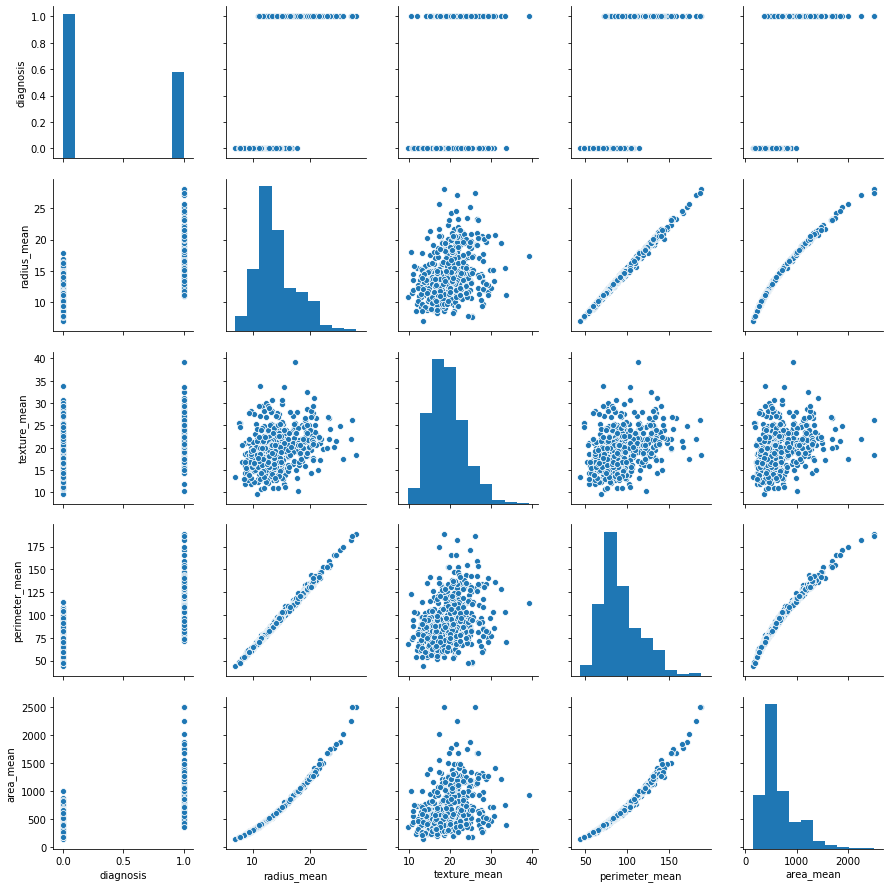

In [14]:
# we want to create a pair plot
# inside the brackets, we give tell it the data we want to pair with, ie the columns we want to match with.
# we can use for example, all the rows from index 1 up to index 6(excluding index 6 )":,1:6" . so column 1 to 5
sns.pairplot(df.iloc[:,1:6])

in the plots above we can see diagnosis which is at index 1, radius_mean : index 2, texture_mean : index 3, perimeter_mean :index 4, area_mean :index 5. so we are comparing 5 columns

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


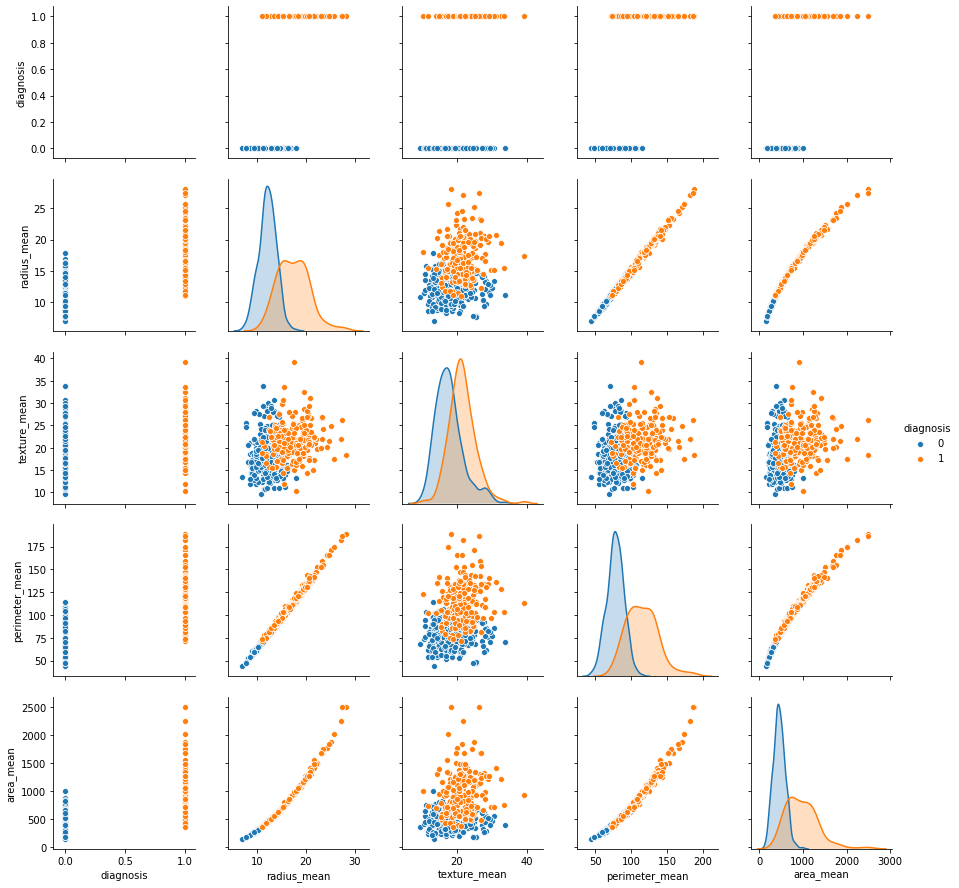

In [15]:
# we can further show the diagnosis points on these graphs
sns.pairplot(df.iloc[:,1:6], hue='diagnosis')

the benign cells are represented by blue = 0.
the malignant"cancer" cells are represented by hue = 1

In [16]:
# print the first 5 rows of the data set
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
# get the correlation of the columns
# as before we we want col 1 to 11 and since it is an array, we use 1 to 12. the corr() invokes the correlation
# this shows us how one column can influence the other
# the radius_mean has influence on the diagnosis column
# the fractal_dimension_mean has a -ve influence or correlation on the diagnosis column
df.iloc[:,1:12].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


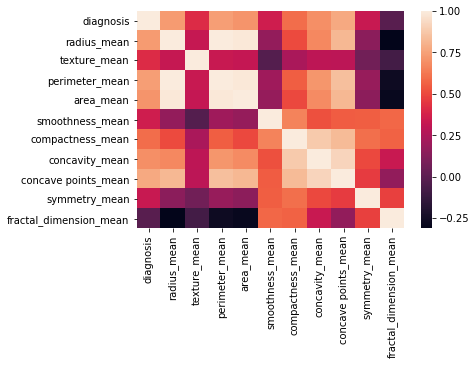

In [18]:
# we want to visualize the correlation using the sebon library

sns.heatmap(df.iloc[:,1:12].corr())

we can see that radius mean has a decent influence on the diagnosis column **(this heat map can be used in the lotto analysis)**

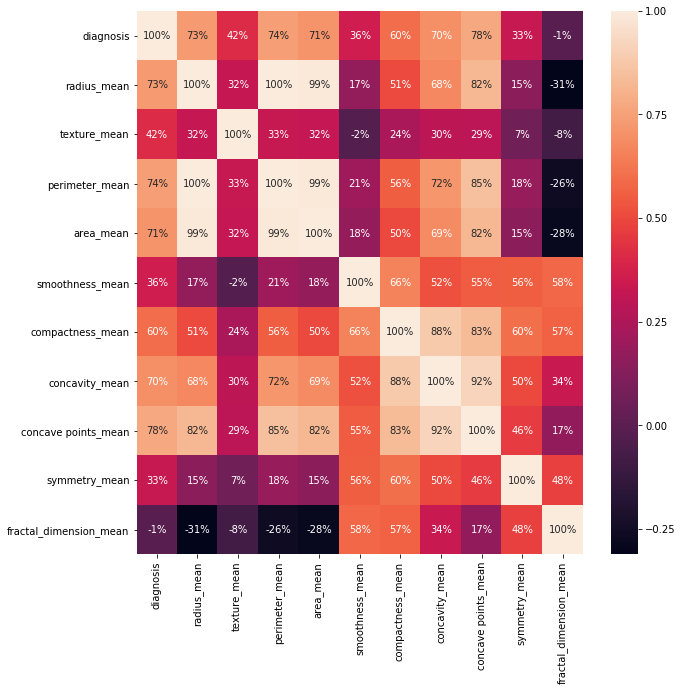

In [23]:
# we can display the values on the heat map
# the size is increased using the "plt.figure(figsize=(10,10))" 
# the number annotationn is added using "annot=True"
# the percentage is added using fmt='.0%'
plt.figure(figsize=(10,10)) 
sns.heatmap(df.iloc[:,1:12].corr(), annot=True, fmt='.0%')


In [0]:
# we now split the data set into independent and dependent data set's
# x contains the columns from 2 to 30
# y contains all the rows from the column at index 1 (diagnosis column)
# we can use "type(x)" to check the type of data
x = df.iloc[:,2:31]
Y = df.iloc[:,1].values



the **dependent dataset(y), the diagnosis** will tell us is the patient has cancer or not while the **independent dataset (x)** will tell us the features that can detect if the patient has cancer or not

In [0]:
#here we split the dataset into 75% trainning and 25% testing
# 25% of our data is "x_test" . "Y_test" correlated to "x_test" dataset 
# 75% of our data is "x_train" . and "Y_train" correlates to "x_train" dataset
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x,Y,test_size = 0.25, random_state = 0 )

In [0]:
# next, we want to scale the data to bring all the features to the same level of magnitude.
# this implies that the data will be within a specific range e.g "0 to 100" or "0 to 1"
# this is also called feature scalling
# for this we use the standardscaler library
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# we then transform the data . we want to transform our features i.e X_train
# we also want to perform this transform on all of the independent data
# we then store the transformation back into our original data set
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)



In [0]:
# now i create a model to detect cancer
# the function will use logistic regression
# each classifier is imported from sklearn
# to train the data, the fit method is also used

def models(x_train, Y_train):

  #logistic regression classifier
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state=0)
  log.fit(x_train, Y_train)

  #Decision Tree classifier
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
  tree.fit(x_train, Y_train)

  #Random forest classifier
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(x_train,Y_train)

  #print the models accuracy on the trainning data using the score method
  print('[0]Logistic Regression Training Accuracy:', log.score(x_train, Y_train))
  print('[1]Decision Tree Classifier Training Accuracy:', tree.score(x_train, Y_train))
  print('[2]Random forest classifier Training Accuracy:', forest.score(x_train, Y_train))

  return log, tree, forest


In [46]:
# getting all the models
# this will show us how good our models did on the trainning data
model = models(x_train,Y_train)

[0]Logistic Regression Training Accuracy: 0.9906103286384976
[1]Decision Tree Classifier Training Accuracy: 1.0
[2]Random forest classifier Training Accuracy: 0.9953051643192489


In [48]:
# here we test our model on the testing data using the confusion matrix
# we are testing the model accuracy on the test data
# this is the model prediction for the testing data"model[0].predict(x_test)" "0" sginifies the logistic regression model
# it will give us what it thinks the actual values are for the features in the testing data. Y_test is the actual values

from sklearn.metrics import confusion_matrix
for i in range(len(model) ):
  print('Model ', i)
  cm = confusion_matrix(Y_test, model[0].predict(x_test))

  TP = cm[0][0]
  TN = cm[1][1]
  FN = cm[1][0]
  FP = cm[0][1]

  print(cm)
# the confusion matrix shows the true positives and true negatives , false negatives and false positives
# true +ve=86, true -ve=50, [the confused values(false +ve=4, false -ve=3)]
# to get the accuracy of our model on this testing data,

  print('Testing Accuracy = ',(TP + TN)/ (TP + TN + FN + FP))
  print()

# this will show us the regression model's accuracy on the testing data

Model  0
[[86  4]
 [ 3 50]]
Testing Accuracy =  0.951048951048951

Model  1
[[86  4]
 [ 3 50]]
Testing Accuracy =  0.951048951048951

Model  2
[[86  4]
 [ 3 50]]
Testing Accuracy =  0.951048951048951



In [55]:
# metrix of the models
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range(len(model) ):
  print(classification_report(Y_test,model[i].predict(x_test)))
  print(accuracy_score(Y_test, model[i].predict(x_test)))



              precision    recall  f1-score   support

           0       0.97      0.96      0.96        90
           1       0.93      0.94      0.93        53

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143

0.951048951048951
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        90
           1       0.88      0.96      0.92        53

    accuracy                           0.94       143
   macro avg       0.93      0.94      0.93       143
weighted avg       0.94      0.94      0.94       143

0.9370629370629371
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        90
           1       0.94      0.96      0.95        53

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97    

# how well a model generalises on the test data is important

In [56]:
# here we print the prediction of the random forest classifier model
# model 2 is our decision tree classifier
# it isd going to predict the values on the testing data from the features in the testing data
# i.e, it is going to classift or decide weather or not the patient has cancer
pred = model[2].predict(x_test)
print(pred)
print()
print(Y_test) # actual result

[1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]
